# Cross Validation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('./Datasets/train.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in train_data.columns if
                    train_data[cname].nunique() < 10 and 
                    train_data[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in train_data.columns if 
                train_data[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X = train_data[my_cols].copy()

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [6]:
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
                     ])
    
    scores = -1 * cross_val_score(pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')

    return scores.mean()

In [7]:
results = {}
for num_estimators in range(50, 401, 50):
    results[num_estimators] = get_score(num_estimators)

In [10]:
%pip install matplotlib

     |████████████████████████████████| 13.1 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 3.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
print(results.keys())

dict_keys([50, 100, 150, 200, 250, 300, 350, 400])


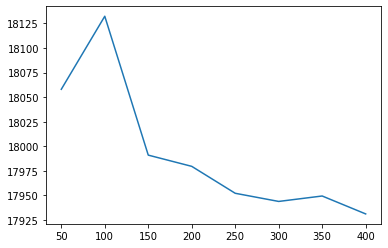

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()